# A Market Basket Analysis: Mall Customers in the U.S.

## Introduction

Several business entities are developing a prominent business strategy to target specific groups of customers and effectively allocate marketing resources. One of such business strategies is customer segmentation, which is the partitions customers into groups of individuals that have similar characteristics. This partitioning helps business target the specific groups of customers and effectively allocate marketing resources. This project develops a customer segmentation model based on unsupervised learning(clustering) for a mall in the U.S. to find the hidden data patterns or structures which can be used to target the right audience and hence increase profit margin. Typically, mall members might contain customers who are high-profit and low-risk, that is, more likely to purchase products or subscribe for a service; another group might include customers from non-profit organizations. The overall goal of this project is to help mall business how it can retain those customers based on machine learning models.
The specific project goals are following -
1. Learn customer segmentation concepts
2. Apply unsupervised machine learning skills/technique
3. Identify customers who are likely to converge
4. Explore marketing strategy from a real-world perspective

In [37]:
## Importing the Required Libraries. This will be updated in the following sections as needed. 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #libraries for visualization

In [39]:
#Import dataset
data = pd.read_csv('Mall_Customers.csv')

### Data Exploration
I begin the project by exploring data. This is done by data wrangling (reading in dataset,data types, any missing data, null data, etc.). 

In [40]:
data.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Rename columns

In [42]:
data.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
data.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [58]:
#Checking if any missing values are present
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending= False)

,count,%
Gender,0,0.0
Age,0,0.0
Income,0,0.0
Score,0,0.0


In [59]:
data.isna().any()

Gender    False
Age       False
Income    False
Score     False
dtype: bool

As seen in the output above there are no missing values in the dataset.

In [57]:
#Check categorical variables
data.select_dtypes('object')

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


In [61]:
#Average age by gender
data.groupby('Gender').mean()

,Age,Income,Score
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [44]:
data.describe()

,CustomerID,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [45]:
#Drop columns that are not important in the analysis
data.drop('CustomerID',axis=1,inplace=True)

In [50]:
print("Mean of Annual Income (k$) of Female:",round(data['Income'].loc[data['Gender'] == 'Female'].mean()))
print("Mean of Annual Income (k$) of Male:", round(data['Income'].loc[data['Gender'] == 'Male'].mean()))

Mean of Annual Income (k$) of Female: 59
Mean of Annual Income (k$) of Male: 62


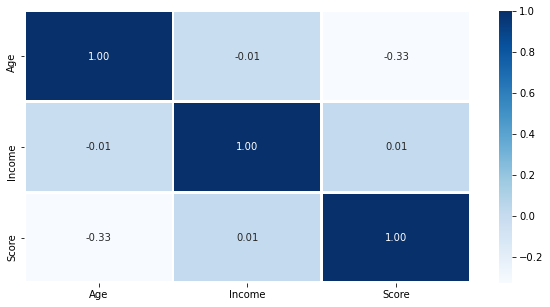

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='Blues',fmt='.2f',linewidths=2)
plt.show()

There is no clear dependence/correlation of one column on the other. Further understanding distribution, relation between features.

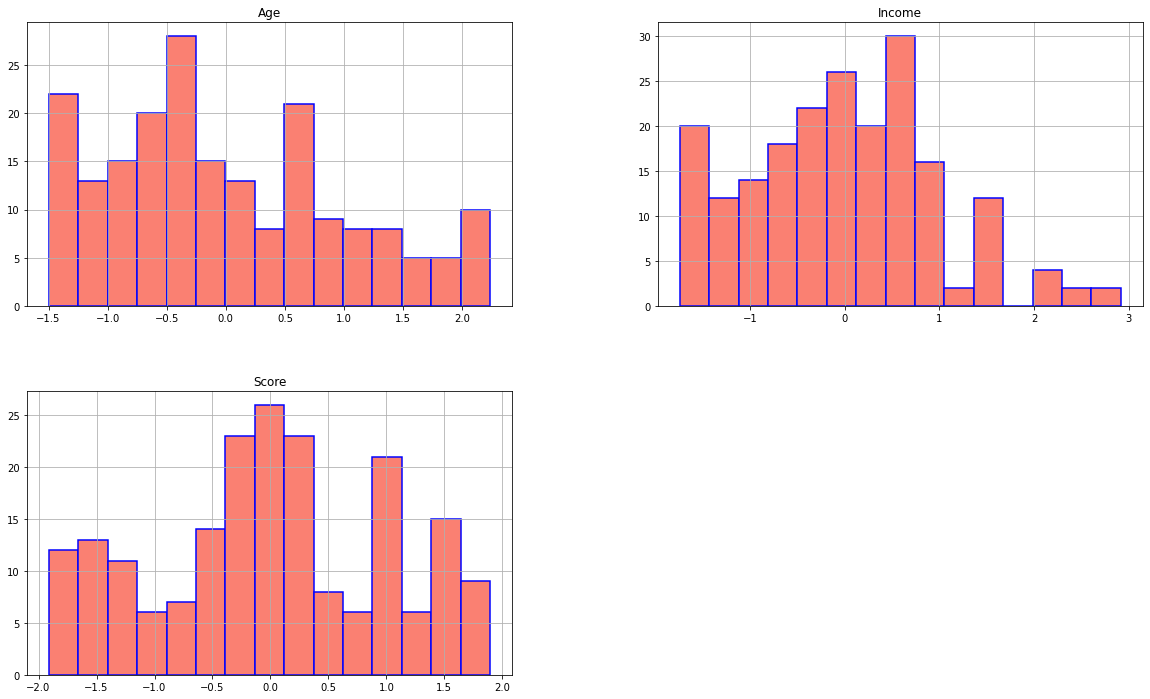

In [88]:
#Plot distribution of selected numerical features
distribution = ['Age', 'Income', 'Score']
data[distribution].hist(figsize = (20, 12), bins = 15, layout = (2, 2), 
                          color = 'salmon', edgecolor = 'blue', linewidth = 1.5);

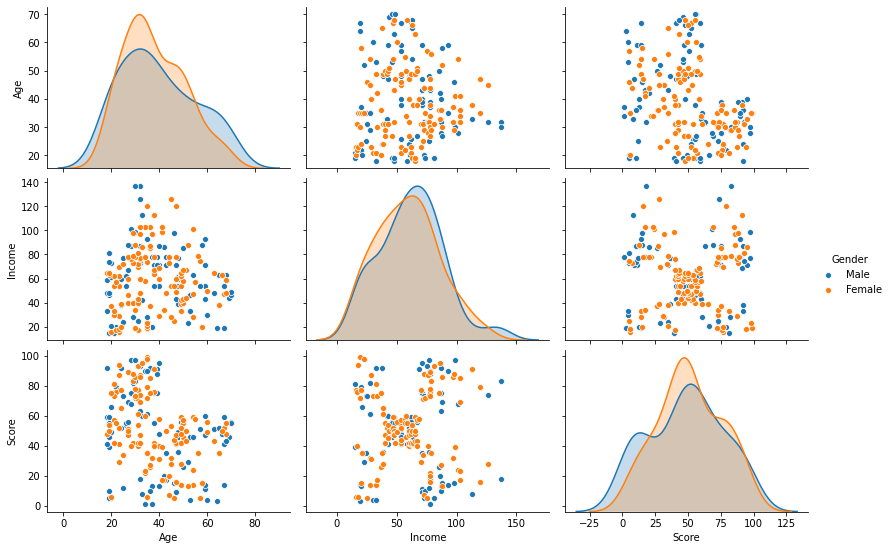

In [69]:
#Pairplot observation
g = sns.pairplot(data, vars=['Age','Income','Score'], hue='Gender',aspect=1.5)

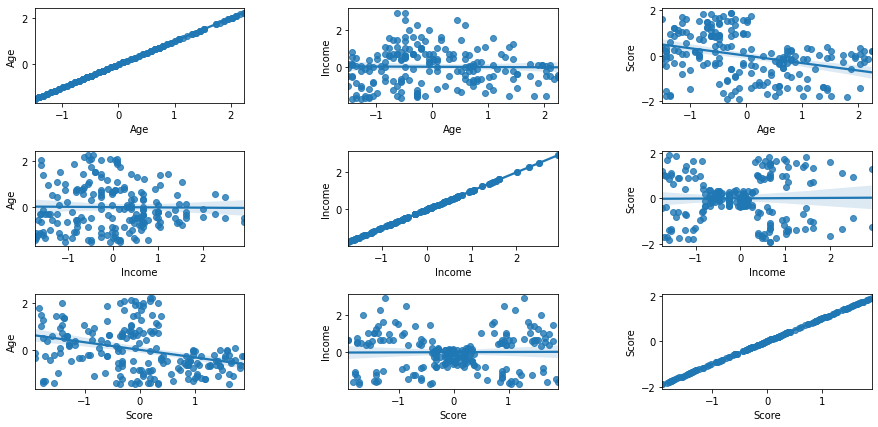

In [89]:
plt.figure(1,figsize=(15,7))
n=0
for x in ['Age','Income','Score']:
    for y in ['Age','Income','Score']:
        n+=1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(x=x,y=y,data=data)
        plt.ylabel(y.split()[0]+''+y.split()[1] if len(y.split())>1 else y)
plt.show()

Spending score and income has an interesting pattern.Gender has no direct relation to segmenting customers.

### Next session will cover preprocessing and modeling.